In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv("E:\\EXCELR\\PARTH SIR\\inclass excercises\\datasets\\decision Tree\\Company_Data.csv")

In [4]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# Data Preprocessing

In [12]:
#Converting target variable in categorical variable
data["Sales"] = np.where(data['Sales']>8,'yes','no') 

In [13]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,no,117,100,4,466,97,Medium,55,14,Yes,Yes
4,no,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,no,139,23,3,37,120,Medium,55,11,No,Yes
397,no,162,26,12,368,159,Medium,40,18,Yes,Yes
398,no,100,79,7,284,95,Bad,50,12,Yes,Yes


In [14]:
#One Hot Encoding for categorical data
data1=pd.get_dummies(data,columns=['ShelveLoc'])
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,yes,138,73,11,276,120,42,17,Yes,Yes,1,0,0
1,yes,111,48,16,260,83,65,10,Yes,Yes,0,1,0
2,yes,113,35,10,269,80,59,12,Yes,Yes,0,0,1
3,no,117,100,4,466,97,55,14,Yes,Yes,0,0,1
4,no,141,64,3,340,128,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,33,14,Yes,Yes,0,1,0
396,no,139,23,3,37,120,55,11,No,Yes,0,0,1
397,no,162,26,12,368,159,40,18,Yes,Yes,0,0,1
398,no,100,79,7,284,95,50,12,Yes,Yes,1,0,0


In [15]:
data1.Sales.replace(('yes','no'),(1, 0),inplace=True)
data1.Urban.replace(('Yes','No'),(1, 0),inplace=True)
data1.US.replace(('Yes','No'),(1, 0),inplace=True)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,138,73,11,276,120,42,17,1,1,1,0,0
1,1,111,48,16,260,83,65,10,1,1,0,1,0
2,1,113,35,10,269,80,59,12,1,1,0,0,1
3,0,117,100,4,466,97,55,14,1,1,0,0,1
4,0,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,1,1,0,1,0
396,0,139,23,3,37,120,55,11,0,1,0,0,1
397,0,162,26,12,368,159,40,18,1,1,0,0,1
398,0,100,79,7,284,95,50,12,1,1,1,0,0


In [17]:
data1.dtypes

Sales               int64
CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
Urban               int64
US                  int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
dtype: object

In [19]:
X=pd.concat([data1.iloc[:,1:]])
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,0,1,0
396,139,23,3,37,120,55,11,0,1,0,0,1
397,162,26,12,368,159,40,18,1,1,0,0,1
398,100,79,7,284,95,50,12,1,1,1,0,0


In [20]:
Y=data1.iloc[:,0]
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [74]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=246,test_size=0.2)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 12)
(80, 12)
(320,)
(80,)


In [76]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [77]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

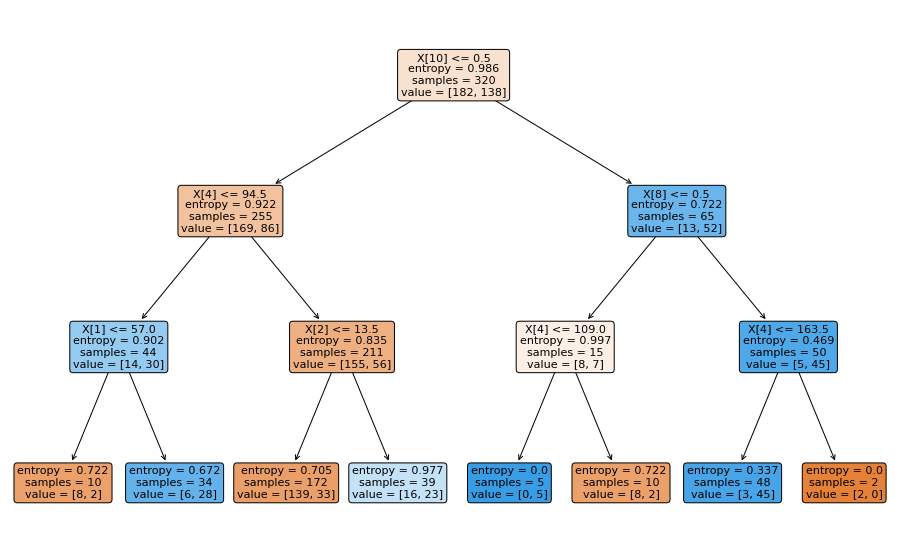

In [78]:
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()

In [79]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    52
1    28
dtype: int64

In [80]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,44,10
1,8,18


In [81]:
# Accuracy 
np.mean(preds==Y_test)

0.775

In [82]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.69      0.64      0.67        28

    accuracy                           0.78        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.77      0.78      0.77        80



In [83]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [84]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [85]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.775